In [22]:
import nltk
from nltk.corpus import movie_reviews
import random

documents = [(list(movie_reviews.words(fileid)), category)
              for category in movie_reviews.categories()
              for fileid in movie_reviews.fileids(category)]


# 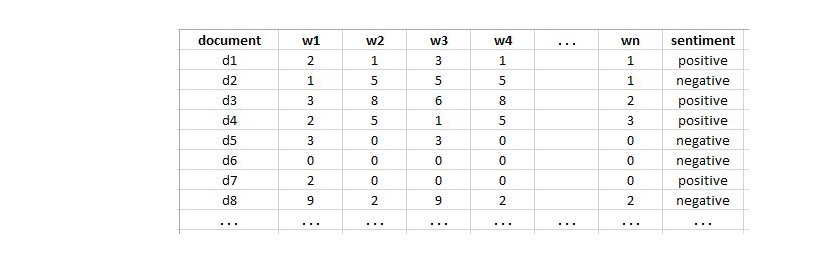


# 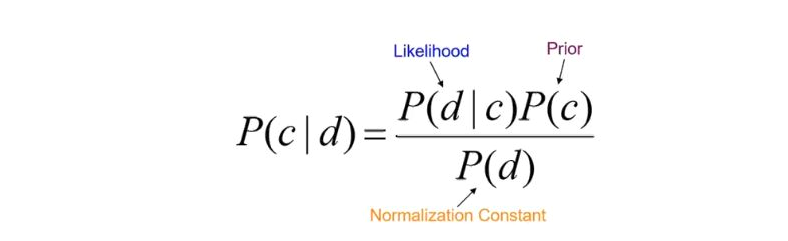


In [23]:
print(documents[1])

(['the', 'happy', 'bastard', "'", 's', 'quick', 'movie', 'review', 'damn', 'that', 'y2k', 'bug', '.', 'it', "'", 's', 'got', 'a', 'head', 'start', 'in', 'this', 'movie', 'starring', 'jamie', 'lee', 'curtis', 'and', 'another', 'baldwin', 'brother', '(', 'william', 'this', 'time', ')', 'in', 'a', 'story', 'regarding', 'a', 'crew', 'of', 'a', 'tugboat', 'that', 'comes', 'across', 'a', 'deserted', 'russian', 'tech', 'ship', 'that', 'has', 'a', 'strangeness', 'to', 'it', 'when', 'they', 'kick', 'the', 'power', 'back', 'on', '.', 'little', 'do', 'they', 'know', 'the', 'power', 'within', '.', '.', '.', 'going', 'for', 'the', 'gore', 'and', 'bringing', 'on', 'a', 'few', 'action', 'sequences', 'here', 'and', 'there', ',', 'virus', 'still', 'feels', 'very', 'empty', ',', 'like', 'a', 'movie', 'going', 'for', 'all', 'flash', 'and', 'no', 'substance', '.', 'we', 'don', "'", 't', 'know', 'why', 'the', 'crew', 'was', 'really', 'out', 'in', 'the', 'middle', 'of', 'nowhere', ',', 'we', 'don', "'", 't'

In [13]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]
print(word_features[2])

def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

two


In [10]:
# Train Naive Bayes classifier
featuresets = [(document_features(d), c) for (d,c) in documents]
train_set, test_set = featuresets[100:], featuresets[:100]
classifier = nltk.NaiveBayesClassifier.train(train_set)


({'contains(plot)': True, 'contains(:)': True, 'contains(two)': True, 'contains(teen)': False, 'contains(couples)': False, 'contains(go)': True, 'contains(to)': True, 'contains(a)': True, 'contains(church)': False, 'contains(party)': False, 'contains(,)': True, 'contains(drink)': False, 'contains(and)': True, 'contains(then)': False, 'contains(drive)': False, 'contains(.)': True, 'contains(they)': True, 'contains(get)': False, 'contains(into)': False, 'contains(an)': True, 'contains(accident)': False, 'contains(one)': True, 'contains(of)': True, 'contains(the)': True, 'contains(guys)': False, 'contains(dies)': False, 'contains(but)': True, 'contains(his)': True, 'contains(girlfriend)': False, 'contains(continues)': False, 'contains(see)': True, 'contains(him)': True, 'contains(in)': True, 'contains(her)': True, 'contains(life)': False, 'contains(has)': False, 'contains(nightmares)': False, 'contains(what)': True, "contains(')": True, 'contains(s)': True, 'contains(deal)': False, 'conta

In [16]:
# Test the classifier

print(nltk.classify.accuracy(classifier, test_set))

0.8752631578947369


In [21]:
# Show the most important features as interpreted by Naive Bayes
classifier.show_most_informative_features(5)

Most Informative Features
    contains(recognizes) = True              pos : neg    =      8.1 : 1.0
 contains(unimaginative) = True              neg : pos    =      7.8 : 1.0
    contains(schumacher) = True              neg : pos    =      7.8 : 1.0
        contains(turkey) = True              neg : pos    =      6.5 : 1.0
     contains(atrocious) = True              neg : pos    =      6.4 : 1.0
